## Описание проекта

**Анализ поведения пользователей мобильного приложения**

Мы работаем в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи нашего мобильного приложения.

- Изучение воронки продаж.
- Как пользователи доходят до покупки.
- Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах?
- На каких именно?

**Исследование результатов A/A/B-эксперимента.**

Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми.

- Выясним, какой шрифт лучше.

## <a href='#Шаг 1'> Шаг 1. Изучение общей информации</a>


## <a href='#Шаг 2'>Шаг 2. Подготовка данных</a>
21. Замена названия столбцов на удобные;
22. Проверка пропусков и типов данных;
23. Добавление столбцов даты и времени, а также отдельный столбец дат;
24. **Промежуточный вывод**

## <a href='#Шаг 3'>Шаг 3. Изучение и проверка данных</a>
31. Сколько всего событий в логе?
32. Сколько всего пользователей в логе?
33. Сколько в среднем событий приходится на пользователя?
34. Данными за какой период мы располагаем? Найдем максимальную и минимальную дату. Построение гистограммы по дате и времени. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Определеним, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаем на самом деле?
35. Много ли событий и пользователей мы потеряли, отбросив старые данные?
36. Проверим, что у нас есть пользователи из всех трёх экспериментальных групп
37. **Промежуточный вывод**

## <a href='#Шаг 4'>Шаг 4. Изучение воронки событий</a>
41. Посмотрим, какие события есть в логах, как часто они встречаются. Отсортирем события по частоте.
42. Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортием события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.
43. Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Какие данные не нужно учитывать при расчёте воронки.
44. По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки
45. На каком шаге мы теряем больше всего пользователей?
46. Какая доля пользователей доходит от первого события до оплаты?
47. **Промежуточный вывод**

## <a href='#Шаг 5'>Шаг 5. Изучение результатов эксперимента</a>
51. Сколько пользователей в каждой экспериментальной группе?
52. Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.
53. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Можем ли сказать, что разбиение на группы работает корректно?
54. Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можем сделать?

## <a href='#Шаг 6'>Шаг 6. Общий вывод</a>

<a id='Шаг 1'></a>
##  Шаг 1. Изучение общей информации

Каждая запись в логе — это действие пользователя, или событие.
- **EventName** — название события;
- **DeviceIDHash** — уникальный идентификатор пользователя;
- **EventTimestamp** — время события;
- **ExpId** — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

In [1]:
# Необходимые библиотеки для исследования 
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

pd.options.display.max_colwidth = -1

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
prd = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')
prd.sample(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
45724,MainScreenAppear,8404240563510634678,1564730388,248
204531,MainScreenAppear,2557371464585545805,1565110435,246
188762,MainScreenAppear,1521378294033734650,1565085485,247
233928,PaymentScreenSuccessful,2405654768956009727,1565191389,248
21091,CartScreenAppear,3886564097555913607,1564665738,248


In [3]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
prd['EventName'].value_counts()

MainScreenAppear           119205
OffersScreenAppear         46825 
CartScreenAppear           42731 
PaymentScreenSuccessful    34313 
Tutorial                   1052  
Name: EventName, dtype: int64

In [5]:
prd.groupby('DeviceIDHash')['ExpId'].max().value_counts(normalize = True)

248    0.336644
247    0.333731
246    0.329625
Name: ExpId, dtype: float64

In [6]:
prd['DeviceIDHash'].nunique()

7551

#### Промежуточный вывод:
- Заменим названия столбцов
- Заменим название событий, уж больно длинные и "camel" не для нас )
- Данные заполнены верно, пропусков нет
- Переведем столбец EventTimestamp из unix time в привычный формат
- Группы распределены практически ровно между пользователями
- Всего 7551 уникальный пользователь, 5 событий и 3 группы

<a id='Шаг 2'></a>
## Шаг 2. Подготовка данных

#### 21. Заменим названия столбцов на удобные для нас

In [7]:
prd.columns = ['event','id','unix_date','group']

Для удобства переименуем названия событий тоже

In [8]:
prd['event'] = prd['event'].str.replace('ScreenAppear', '').str.replace('ScreenSuccessful', '')

#### 22. Проверим пропуски и типы данных.

Проверим на принадлежность пользователей более, чем к одной группе.

In [9]:
(prd.groupby('id')['group'].nunique().sort_values() > 1).sum()

0

In [10]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
event        244126 non-null object
id           244126 non-null int64
unix_date    244126 non-null int64
group        244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


#### 23. Добавим столбец даты и времени, а также отдельный столбец дат

Переведем столбец EventTimestamp из unix time в привычный формат

In [11]:
prd['datetime'] = pd.to_datetime(prd['unix_date'], unit='s')
prd['date'] = prd['datetime'].dt.date
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
event        244126 non-null object
id           244126 non-null int64
unix_date    244126 non-null int64
group        244126 non-null int64
datetime     244126 non-null datetime64[ns]
date         244126 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


#### 24. Промежуточный вывод

- Изменили названия столбцов
- Изменили названия событий 
- Проверили данные на наличие пропусков
- Проверили пользователей на принадлежность более, чем к одной группе
- Перевели unix time в привычный формат даты
- Добавили столбец с датой

<a id='Шаг 3'></a>
## Шаг 3. Изучим и проверим данные

#### 31. Сколько всего событий в логе?

In [12]:
len(prd)

244126

#### 32. Сколько всего пользователей в логе?

In [13]:
prd['id'].nunique()

7551

#### 33. Сколько в среднем событий приходится на пользователя?

In [14]:
len(prd) / prd['id'].nunique()

32.33028737915508

Посмотрим, из каких событий состоит их среднее количество

In [15]:
(prd.groupby('event')['id'].count()/prd['id'].nunique()).round().sort_values()

event
Tutorial    0.0 
Payment     5.0 
Cart        6.0 
Offers      6.0 
Main        16.0
Name: id, dtype: float64

#### 34. Данными за какой период мы располагаем?

Найдем максимальную и минимальную дату. Данными за какой период времени мы располагаем на самом деле?

In [16]:
print('min date:',prd['date'].min())
print('max date:',prd['date'].max())

min date: 2019-07-25
max date: 2019-08-07


На первый взгляд мы располагаем данными почти за две недели

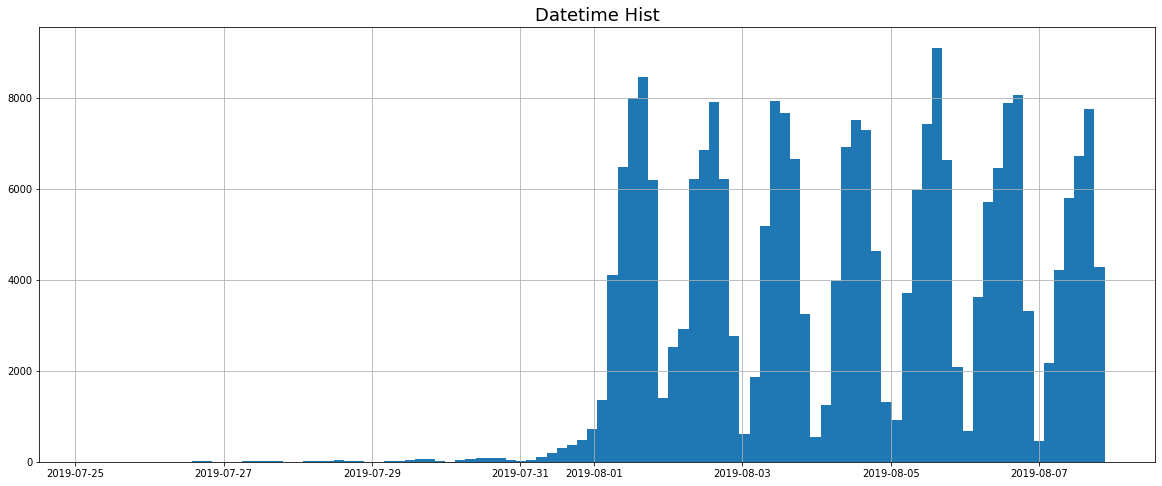

In [17]:
plt.figure(figsize=(20, 8))
plt.title('Datetime Hist', fontsize=18)
plt.grid()
prd['datetime'].hist(bins = 100)

На графике видим, что на самом деле мы распологаем полными данными только с 2019-08-01. Объяснения для такого резкого скачка могут быть следующими:
    - увеличение затрат на маркетинг (поисковые запросы, инстаграм,  youtube)
    - запуск мобильного приложения (до этого была версия для теста)
    - выход на новый (Москвовский, например) рынок
    - проведение акций
    - запуск доставки
    - получение лицензии, например, на алкоголь
    - фундаментальные причины (локдаун), в марте 2020 наверняка примерно так и было ) 
    - устранение тех сбоя приложения

#### 35. Много ли событий и пользователей мы потеряли, отбросив старые данные?

In [18]:
#Добавляем фильтр к данным (дата)
prd_2 = prd[prd['datetime'] >= "2019-08-01"]
loss_ev = len(prd) - len(prd_2)
loss_ev 

2828

In [19]:
'{:.2%}'.format(loss_ev / len(prd))

'1.16%'

In [20]:
loss_id = prd['id'].nunique() - prd_2['id'].nunique()
loss_id

17

In [21]:
'{:.2%}'.format(loss_id / prd['id'].nunique())

'0.23%'

Отбросив ненужные данные мы потеряем 2828 события (около 1% от общего числа) и 17 уникальных пользователей (около 0,23% от общего числа)

#### 36. Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [22]:
n_group = prd_2.groupby('group')['id'].nunique().reset_index()
n_group['share'] = (n_group['id'] / n_group['id'].sum()).round(2)
n_group

,group,id,share
0,246,2484,0.33
1,247,2513,0.33
2,248,2537,0.34


Пользователи распределны по трем группам равномерно

#### 37. Промежуточный вывод

- Всего в логе **244 126** события
- Уникальных пользователей **7551**
- В среднем на одного пользователя приходится **32** события (15 посещений главной страницы и по 5-6 остальных событий)
- Выделяем рассматриваемый период с **2019-08-01**, так как только с этого времени мы располагаем полными данными.
- Сократив исследуемый период мы потерями всего 2828 (**коло 1%**) событий и 17 уникальных пользователей (**около 0,2%**)
- Пользователи разибты между группами равномерно (около **2500** пользователей)

<a id='Шаг 4'></a>
## Шаг 4. Изучение воронки событий

#### 41. Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [23]:
#Посчитаем количество разных событий
n_event = prd_2.groupby('event')['id'].count().reset_index()
n_event['part'] = (n_event['id'] / n_event['id'].sum()).round(3)
n_event = n_event.sort_values(by = 'id', ascending = False)

#Форматирование таблицы
format_dict = {'part': '{:.1%}'}
n_event\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['part'], cmap='RdBu')\
.set_properties(**{'width': '100px'})

event,id,part
Main,117431,48.7%
Offers,46350,19.2%
Cart,42365,17.6%
Payment,34113,14.1%
Tutorial,1039,0.4%


Видим, что половина событий - это переход на главную страницу, тут ничего удивительного. В то время как прочтение инструкции менее 0,5% событий

#### 42. Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [24]:
#Посчитаем количество уникальных пользователей совершавших события
n_id = prd_2.groupby('event')['id'].nunique().reset_index()
n_id['part'] = (n_id['id'] / n_id['id'].max()).round(3)
n_id= n_id.sort_values(by = 'id', ascending = False)
n_id.columns =['event','n_users','part']

#Форматирование таблицы
format_dict = {'part': '{:.1%}'}
n_id\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['part'], cmap='RdBu')\
.set_properties(**{'width': '100px'})

event,n_users,part
Main,7419,100.0%
Offers,4593,61.9%
Cart,3734,50.3%
Payment,3539,47.7%
Tutorial,840,11.3%


Из таблицы выше можем сказать что почти половина уникальных пользователей оплачивала заказ (47.7%) и каждый 10ый читал инстуркцию.

#### 43. Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Какие данные не нужно учитывать при расчёте воронки.

Порядок событий совпадает с количеством совершенных событий пользователями (main - offers - cart - payment)

1. Main -  посещение главной страницы
2. Offers - просмотр предложений
3. Cart - добавление в корзину
4. Payment - оплата заказа

PS - Tutorial - не вписывается в цепочку - убирем из воронки

In [25]:
#Добавляем фильтр к данным (событие)
prd_3 = prd_2.query('event != "Tutorial"')

#### 44. По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки 

In [26]:
#Создаем сводную таблицу, в которой события разнесены по столбцам
x = prd_3.pivot_table(index = 'id', columns = 'event', values = 'datetime', aggfunc = 'min').reset_index()
x = x[['Main','Offers','Cart','Payment']]

#Считаем количество уникальных пользователей дошедших последовательно до соответствующего события
n_main = x['Main'].notna().sum()
n_offers = (x['Main'].notna() & (x['Offers'] > x['Main'])).sum()
n_cart = (x['Main'].notna() & (x['Offers'] > x['Main']) & (x['Cart'] > x['Offers'])).sum()
n_pay = (x['Main'].notna() & (x['Offers'] > x['Main']) & (x['Cart'] > x['Offers']) & (x['Payment'] > x['Cart']) ).sum()

#Создаем датафрейм с коверсией пользователей
conversion = pd.DataFrame({ 'event': ['Main','Offers','Cart','Payment'],'n_users': [n_main, n_offers,n_cart,n_pay ]})
conversion['users_shift'] = conversion['n_users'].shift(periods=1, fill_value= conversion['n_users'].max())
conversion['total_conv'] = (conversion['n_users'] / conversion['n_users'].max())
conversion['next_step_conv'] = (conversion['n_users'] / conversion['users_shift'])

#Форматирование таблицы
conv_table1 = conversion[['event','n_users','total_conv','next_step_conv']]
format_dict = {'total_conv': '{:.1%}','next_step_conv': '{:.1%}'}

conv_table1\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['next_step_conv'], cmap='RdBu')\
.set_properties(**{'width': '100px'})

event,n_users,total_conv,next_step_conv
Main,7419,100.0%,100.0%
Offers,4201,56.6%,56.6%
Cart,1767,23.8%,42.1%
Payment,454,6.1%,25.7%


#### 45. На каком шаге мы теряеем больше всего пользователей?

In [27]:
#Создаем столбцы с количеством потеряных пользователей и их долей
conversion['losses'] = conversion['n_users'] - conversion['users_shift']
conversion['losses%'] = (conversion['n_users'] / conversion['users_shift'])-1

#Форматирование таблицы
conv_table2 = conversion[['event','n_users','losses','losses%']]
format_dict = {'losses%': '{:.1%}'}
conv_table2\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['losses%'], cmap='RdBu')\
.set_properties(**{'width': '100px'})

event,n_users,losses,losses%
Main,7419,0,0.0%
Offers,4201,-3218,-43.4%
Cart,1767,-2434,-57.9%
Payment,454,-1313,-74.3%


Из таблицы выше видим, чтобольше всего пользователей в абсолютном значении мы теряем на переходе от главной страницы к странице с предложениями ( 3218 пользователей), однако в процентом соотношении самые большие наши потери на этапе оплаты заказа после добавления в корзину (74,3 %) 

**Возможные причины потери пользователей:**
1. Не переходят к странице с предложениями (больше всего пользователей мы потеряли именно тут 3218 человек): 

    - **Пользователи**
        - пользователи пришли в приложение не с целью покупки, просто посмотреть ассортимент
    - **Предложение**
        - пользователи не находят то, зачем пришли в приложение
        - польщователи перешли в приложение по рекламе скидок, но не нашли хороших предложений для себя
    - **Дизайн сайта / приложения**
         - пользователи не могут разобраться со структурой приложения (плохой UX)
         - в целом плохой дизайн приложения, который отпугивает посетителей
         - необходима регистарация на этапе просмотра предложений
         - тех. сбой приложения
    
    
2. Пользователи не добавляют в корзину:

    - **Цена**
        - пользователей не устраивает цена
    - **Отсутвие товара**    
    - **Доставка**    
        - отсутствие доставки
        - пользователей не устраивает срок доставки
        - пользователей не устраивает стоимость доставки
    - **Приложение**
        - необходима регистарация на этапе добавления в корзину
        - отсутствие описания/фото/видео товаров на странице с предожениями
        - отсутствие отзывов на странице с предожениями
        - не увидели / не нашли кнопку "добавить в корзину"
        - тех. сбой приложения
    
    
3. Не оплачивают товар:

    - самую большую долю пользователей мы теряем именно здесь (почти половина), возможно, это связано с техническими проблемами оплаты:
        - нет возможности оплатить картой, apple pay или иными способами
        - тех. сбой сайта / приложения
    - возможное взятие комиссий за оплату     
    - необходима регистарация на этапе оплаты товара

   

**Рекомендации:**
1. Переход странице с предложениями (больше всего пользователей мы потеряли именно тут 3218 человек):

    - Провести событийную аналитку, посмотреть очередность действий пользователей и время затраченное на отдельные события, например, возможно, польщователь тратит на регистрацию минуты и после уходит из приложения так и не закончив регистрацию)
    - Провести анализ просмотра страницы постетителем (вебвизор, тепловые карты) - возможно на этом этапе найдем причину потерь
    - Улучшить UX приложения путем проведения A/B тестов, предварительно приоритизировав гипотезы
    - Использование Яндекс.Метрики для анализа узких мест
    - Перенятие лучших практик у конкурентов
    - Обучение
    - Гугл
    
    
2. Добавление в корзину:

    - Анализ цен и сроков доставки у конкурентов
    - Введение системы предсказания спроса
    - Добавление отзывов в приложении 
    - Добавление подробных описаний, фото и видеообзоров в приложение
    - Анализ кнопки "корзина" особо важен (вот тут попроводить A/B тесты, конечно бы) 


3. Оплата товара:

    - Добавить новые возможности оплаты
    - Убрать комиссии за оплту - если есть
    - Анализ UX приложения 

#### 46. Какая доля пользователей доходит от первого события до оплаты?

In [28]:
#Форматирование таблицы
format_dict = {'total_conv': '{:.1%}','next_step_conv': '{:.1%}'}
conv_table1\
.style\
.format(format_dict)\
.hide_index()\
.highlight_min(subset=['total_conv'], color='#cd4f39')\
.set_properties(**{'width': '100px'})

event,n_users,total_conv,next_step_conv
Main,7419,100.0%,100.0%
Offers,4201,56.6%,56.6%
Cart,1767,23.8%,42.1%
Payment,454,6.1%,25.7%


Полный путь от посещения главной страницы до оплаты заказа проходят только 6% пользователей

#### 47. Промежуточный вывод

- Видим, что **половина** всех событий - это переход, прочтение инструкции - менее 0,5% событий
- Почти половина уникальных пользователей оплачивала заказ (**47.7%**) , каждый 10ый читал инструкцию.
- **Порядок событий** совпадает с количеством совершенных событий пользователями. Tutorial - убираем из цепочки, это событие никак не влияет на конверсию

    - Main - посещение главной страницы
    - Offers - просмотр предложений
    - Cart - добавление в корзину
    - Payment - оплата заказа
    

- Больше всего пользователей в абсолютном значении мы теряем на переходе от главной страницы к странице с предложениями ( **3218** пользователей), возможно стоит улучшить алгоритм обеспечивающий рекомендации пользователям

- В процентом соотношении самые большие наши потери на этапе оплаты заказа после добавления в корзину (**74,3 %**), необходимо исследовать эту проблему, может есть какая техническая проблема с оплатой заказа

- Полный путь от посещения главной страницы до оплаты заказа проходят только **6%** пользователей

<a id='Шаг 5'></a>
## Шаг 5. Изучение результатов эксперимента

#### 51. Сколько пользователей в каждой экспериментальной группе?

In [29]:
#Создаем сводную таблицу, в которой события разнесены по столбцам
aa = prd_3.pivot_table(index = ['group','id'], columns = 'event', values = 'datetime', aggfunc = 'min').reset_index()

#Считаем количество пользователей посетивших главную страницу в каждой группе
group_main =\
aa[aa['Main'].notna()]\
.groupby('group')['id'].count().reset_index()

#Считаем количество пользователей совершивших просмотр предложений в каждой группе
group_offers =\
aa[aa['Main'].notna() & (aa['Offers'] > aa['Main'])]\
.groupby('group')['id'].count().reset_index()

#Считаем количество пользователей дошедших до корзины в каждой группе
group_cart =\
aa[aa['Main'].notna() & (aa['Offers'] > aa['Main']) & (aa['Cart'] > aa['Offers'])]\
.groupby('group')['id'].count().reset_index()

#Считаем количество пользователей оплативших заказ в каждой группе
group_pay =\
aa[aa['Main'].notna() & (aa['Offers'] > aa['Main']) & (aa['Cart'] > aa['Offers']) & (aa['Payment'] > aa['Cart'])]\
.groupby('group')['id'].count().reset_index()

#Соберем все данные в единую таблицу
conv_by_group = pd.merge(group_main, group_offers, on = 'group')
conv_by_group = pd.merge(conv_by_group, group_cart, on = 'group' )
conv_by_group = pd.merge(conv_by_group, group_pay, on = 'group' )
conv_by_group.columns = ['group','main', 'offers', 'cart', 'payment']

#Добавим столбец с конверсией пользователей из просмотра главной страницы в оплату
conv_by_group['pm_conv'] = conv_by_group['payment'] / conv_by_group['main']

#Форматирование таблицы
format_dict = {'pm_conv': '{:.1%}'}
conv_by_group\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['main'], cmap='RdBu')\
.set_properties(**{'width': '100px'})

group,main,offers,cart,payment,pm_conv
246,2450,1411,584,145,5.9%
247,2476,1379,600,144,5.8%
248,2493,1411,583,165,6.6%


Для анализа эксперимента мы отсеили только тех пользователей, где не нарушается последовательность событий (т.е. после посещения главной страницы идет страница с рекомендациями, потом добавление в корзину и  оплата)

После отсеивания технический сбоев, можем убедиться, что не повляило сильно на размер выборок, количество пользователей в каждой группе по прежнему все еще около 2500 пользователей

#### 52. Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

**Критерии успешного A/A-теста:**
- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

In [30]:
a1_pays = conv_by_group[conv_by_group['group'] == 246]['payment'].sum()
a2_pays = conv_by_group[conv_by_group['group'] == 247]['payment'].sum()

a1_visits = conv_by_group[conv_by_group['group'] == 246]['main'].sum()
a2_visits = conv_by_group[conv_by_group['group'] == 247]['main'].sum()

(a1_visits / (a1_visits+ a2_visits)) - (a2_visits / (a1_visits+ a2_visits))

-0.00527811611855461

**Все четыре критерия соблюдены:**
- Количестов пользователей отличается менее, чем на 1%
- Данные об одном и том же (покупки)
- Различие ключевых метрик менее 1% (конверсия в оплату 5,8 и 5,9) 
- Проверили в самом начале работы, что пользователи до конца эксперимента остаются в своих группах

Проверим, существует ли стат значимые различия между конверсиями контрольных групп

Сформулируем гипотезы: 

- **Нулевая гипотеза:** различий между конверсиями контрольных групп нет
- **Альтернативная гипотеза:** имеются статистически значимые различия между конверсиями контрольных групп

Для проверки гипотез о равенстве конверсии используем z-тест

Уровень стат значимости задаем 0.5

In [31]:
#задаем критический уровень статистической значимости
alpha = .05

pays = np.array([a1_pays, a2_pays])
visits = np.array([a1_visits, a2_visits])

# пропорция покупок в группе a1 (246):
p1 = pays[0]/visits[0]

# пропорция покупок в группе a2 (247):
p2 = pays[1]/visits[1]

# пропорция успехов в комбинированном датасете:
p_combined = (pays[0] + pays[1]) / (visits[0] + visits[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/visits[0] + 1/visits[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между конверсиями групп есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии групп разными") 

p-значение:  0.8783092501812453
Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии групп разными


Видим, что вероятность случайно получить различие между конверсиями двух контрольных групп - почти 88%. Следовательно у нас нет никаких оснований считать конверсии групп разными

#### 53. Посчитайте число пользователей, совершивших событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Можно ли сказать, что разбиение на группы работает корректно?

In [32]:
#Создадим таблицу с данными конверсии только по контрольным группам и посчитаем долю пользователей в каждом из событии
conv_by_group_pct = conv_by_group.query('group != 248').copy()
conv_by_group_pct['main%'] = conv_by_group_pct['main'] / conv_by_group_pct['main']
conv_by_group_pct['offers%'] = conv_by_group_pct['offers'] / conv_by_group_pct['main']
conv_by_group_pct['cart%'] = conv_by_group_pct['cart'] / conv_by_group_pct['main']
conv_by_group_pct['payment%'] = conv_by_group_pct['payment'] / conv_by_group_pct['main']
conv_by_group_pct = conv_by_group_pct[['group','main','main%','offers','offers%','cart','cart%','payment','payment%',]]

#Форматирование таблицы
format_dict = {'pm_conv': '{:.1%}','main%': '{:.1%}','offers%': '{:.1%}','cart%': '{:.1%}','payment%': '{:.1%}'}
conv_by_group_pct\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['main%','offers%','cart%','payment%'], cmap='RdBu')\
.set_properties(**{'width': '100px'})

group,main,main%,offers,offers%,cart,cart%,payment,payment%
246,2450,100.0%,1411,57.6%,584,23.8%,145,5.9%
247,2476,100.0%,1379,55.7%,600,24.2%,144,5.8%


Сформулируем гипотезы:

- **Нулевая гипотеза:** различий между конверсиями на определнном событии среди контрольных групп нет
- **Альтернативная гипотеза:** имеются статистически значимые различия между конверсиями на определнном событии среди контрольных групп

Для проверки гипотез о равенстве пропорций используем z-тест

Уровень стат значимости задаем 0.5

In [33]:
#Создадим функцию для перебора событий
def subs(xxx):
    xxx_part1 = conv_by_group_pct[xxx][0] 
    xxx_part2 = conv_by_group_pct[xxx][1] 
    xxx_total1 = conv_by_group_pct['main'][0]
    xxx_total2 = conv_by_group_pct['main'][1]

    parts = np.array([xxx_part1, xxx_part2])
    totals = np.array([xxx_total1, xxx_total2])
    
    p1 = parts[0]/totals[0]
    p2 = parts[1]/totals[1]
    p_combined = (parts[0] + parts[1]) / (totals[0] + totals[1])
    difference = p1 - p2 
    
    alpha = .05
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/totals[0] + 1/totals[1]))
    distr = st.norm(0, 1) 
    p_value = ((1 - distr.cdf(abs(z_value))) * 2).round(3)
    print('p-значение: ', p_value)
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между пропорциями групп в событии",xxx,"нет разницы")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп в событии",xxx,"разными") 

In [34]:
#Создадим список возможных событий, который будем перебирать циклом
event_list = ['offers','cart','payment']

#Собственно, цикл )
for i in event_list:
    print(subs(i))

p-значение:  0.179
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп в событии offers разными
None
p-значение:  0.745
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп в событии cart разными
None
p-значение:  0.878
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп в событии payment разными
None


Исходя из проверок статистических гипотез мы можем сделать вывод, что разбивка на группы прошла корректно

#### 54. Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [35]:
#Создадим таблицу с данными конверсии только по контрольным группам и посчитаем долю пользователей в каждом из событий
conv_by_group['main%'] = conv_by_group['main'] / conv_by_group['main']
conv_by_group['offers%'] = conv_by_group['offers'] / conv_by_group['main']
conv_by_group['cart%'] = conv_by_group['cart'] / conv_by_group['main']
conv_by_group['payment%'] = conv_by_group['payment'] / conv_by_group['main']
conv_by_group = conv_by_group[['group','main','main%','offers','offers%','cart','cart%','payment','payment%',]]

#Форматирование таблицы
format_dict = {'pm_conv': '{:.1%}','main%': '{:.1%}','offers%': '{:.1%}','cart%': '{:.1%}','payment%': '{:.1%}'}
conv_by_group\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['main%','offers%','cart%','payment%'], cmap='RdBu')\
.set_properties(**{'width': '100px'})

group,main,main%,offers,offers%,cart,cart%,payment,payment%
246,2450,100.0%,1411,57.6%,584,23.8%,145,5.9%
247,2476,100.0%,1379,55.7%,600,24.2%,144,5.8%
248,2493,100.0%,1411,56.6%,583,23.4%,165,6.6%


Сравним результаты с каждой из контрольных групп в отдельности по каждому событию

Сформулируем гипотезы:

- **Нулевая гипотеза:** различий конверсий на соответсвующих событиях между контрольными и экспериментальной группами нет
- **Альтернативная гипотеза:** имеются статистически значимые различия конверсий на соответсвующих событиях между контрольными и экспериментальной группами

Для проверки гипотез о равенстве конверсии используем z-тест

Уровень стат значимости задаем 0.5

In [36]:
#Создадим функцию для перебора событий
def subs2(xxx, group1, group2):
    xxx_part1 = conv_by_group[xxx][group1] 
    xxx_part2 = conv_by_group[xxx][group2] 
    xxx_total1 = conv_by_group['main'][group1]
    xxx_total2 = conv_by_group['main'][group2]

    parts = np.array([xxx_part1, xxx_part2])
    totals = np.array([xxx_total1, xxx_total2])
    
    p1 = parts[0]/totals[0]
    p2 = parts[1]/totals[1]
    p_combined = (parts[0] + parts[1]) / (totals[0] + totals[1])
    difference = p1 - p2 
    
    alpha = .05
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/totals[0] + 1/totals[1]))
    distr = st.norm(0, 1) 
    p_value = ((1 - distr.cdf(abs(z_value))) * 2).round(3)
    
    print('p-значение: ', p_value)
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между пропорциями групп",group1,"и",group2,"в событии",xxx,"нет разницы")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп ",group1,"и",group2,"в событии",xxx,"разными")
        

In [37]:
def subs3(event):
    
    group_246 = 0
    group_247 = 1
    group_248 = 2
    
    print(event)
    subs2(event, group_246 , group_248)
    subs2(event, group_247 , group_248)

#И еще один цикл
for i in event_list:
    print(subs3(i))
    print()

offers
p-значение:  0.48
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп  0 и 2 в событии offers разными
p-значение:  0.521
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп  1 и 2 в событии offers разными
None

cart
p-значение:  0.709
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп  0 и 2 в событии cart разными
p-значение:  0.483
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп  1 и 2 в событии cart разными
None

payment
p-значение:  0.31
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп  0 и 2 в событии payment разными
p-значение:  0.241
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп  1 и 2 в событии payment разными
None



Сравним результаты с объединённой контрольной группой

Сформулируем гипотезы:

- **Нулевая гипотеза:** различий конверсий на соответсвующих событиях между объединённой контрольной и экспериментальной группами нет
- **Альтернативная гипотеза:** имеются статистически значимые различия конверсий на соответсвующих событиях между объединённой контрольной и экспериментальной группами

Для проверки гипотез о равенстве конверсии используем z-тест

Уровень стат значимости задаем 0.1, применим поправку Бонферрони. уровень значимости (0,05) делим на  / 0,5 так как мы объеденили  контрольную группу и вероятность ошибки первого рода уменьшится, значит порог стат значимости можно повысить

In [38]:
#Создадим таблицу с данными конверсии только по объеденным контрольным группам эксперементальной 
ab = conv_by_group[['group','main','offers','cart','payment']]
df2 = pd.DataFrame([("246+247",ab['main'][0] + ab['main'][1] ,ab['offers'][0] + ab['offers'][1],ab['cart'][0] + ab['cart'][1],ab['payment'][0] + ab['payment'][1])], columns= ['group','main','offers','cart','payment'])
ab = ab.append(df2,ignore_index=True)
ab = ab.query('group == 248 | group == "246+247"').reset_index()

#Посчитаем долю пользователей в каждом из событий
ab['main%'] = ab['main'] / ab['main']
ab['offers%'] = ab['offers'] / ab['main']
ab['cart%'] = ab['cart'] / ab['main']
ab['payment%'] = ab['payment'] / ab['main']
ab = ab[['group','main','main%','offers','offers%','cart','cart%','payment','payment%',]]


#Форматирование таблицы
format_dict = {'main%': '{:.1%}','offers%': '{:.1%}','cart%': '{:.1%}','payment%': '{:.1%}'}
ab\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['main%','offers%','cart%','payment%'], cmap='RdBu')\
.set_properties(**{'width': '100px'})

group,main,main%,offers,offers%,cart,cart%,payment,payment%
248,2493,100.0%,1411,56.6%,583,23.4%,165,6.6%
246+247,4926,100.0%,2790,56.6%,1184,24.0%,289,5.9%


In [39]:
#Создадим функцию для перебора событий
def subs(xxx):
    xxx_part1 = ab[xxx][0] 
    xxx_part2 = ab[xxx][1] 
    xxx_total1 = ab['main'][0]
    xxx_total2 = ab['main'][1]

    parts = np.array([xxx_part1, xxx_part2])
    totals = np.array([xxx_total1, xxx_total2])
    
    p1 = parts[0]/totals[0]
    p2 = parts[1]/totals[1]
    p_combined = (parts[0] + parts[1]) / (totals[0] + totals[1])
    difference = p1 - p2 
    
    alpha = .05
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/totals[0] + 1/totals[1]))
    distr = st.norm(0, 1) 
    p_value = ((1 - distr.cdf(abs(z_value))) * 2).round(3)
    print('p-значение: ', p_value)
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между пропорциями групп в событии",xxx,"нет разницы")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп в событии",xxx,"разными") 

In [40]:
#Создадим список возможных событий, который будем перебирать циклом
event_list = ['offers','cart','payment']

#Собственно, цикл )
for i in event_list:
    print(subs(i))

p-значение:  0.974
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп в событии offers разными
None
p-значение:  0.535
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп в событии cart разными
None
p-значение:  0.202
Не получилось отвергнуть нулевую гипотезу, нет оснований считать пропорции групп в событии payment разными
None


Можем сделать вывод, что изменение шрифтов во всём приложении никак не повлияло на конверсию. 

<a id='Шаг 6'></a>
## Шаг 6. Общий вывод

#### Описание пользователей

- Всего в логе **244 126** события
- Уникальных пользователей **7551**
- В среднем на одного пользователя приходится **32** события (15 посещений главной страницы и по 5-6 остальных событий)
- Выделяем рассматриваемый период с **2019-08-01**, так как только с этого времени мы располагаем полными данными.
- Сократив исследуемый период мы потерями всего 2828 (**около 1%**) событий и 17 уникальных пользователей (**около 0,2%**)
- Пользователи разбиты между группами равномерно (около **2500** пользователей)


#### Воронка

- Видим, что **половина** всех событий - это переход, прочтение инструкции - менее 0,5% событий
- Почти половина уникальных пользователей оплачивала заказ (**47.7%**) , каждый 10ый читал инструкцию.
- **Порядок событий** совпадает с количеством совершенных событий пользователями. Tutorial - убираем из цепочки, это событие никак не влияет на конверсию

    - Main - посещение главной страницы
    - Offers - просмотр предложений
    - Cart - добавление в корзину
    - Payment - оплата заказа
    
- Больше всего пользователей в абсолютном значении мы теряем на переходе от главной страницы к странице с предложениями ( **3218** пользователей), возможно стоит улучшить алгоритм обеспечивающий рекомендации пользователям
- В процентом соотношении самые большие наши потери на этапе оплаты заказа после добавления в корзину (**74,3 %**), необходимо исследовать эту проблему, может есть какая техническая проблема с оплатой заказа
- Полный путь от посещения главной страницы до оплаты заказа проходят только **6%** пользователей (конверсия в покупку)

#### Рекомендации по увеличению конверсии:

1. Переход к странице с предложениями (больше всего пользователей мы потеряли именно тут 3218 человек):

    - Провести событийную аналитку, посмотреть очередность действий пользователей и время затраченное на отдельные события, например, возможно, польщователь тратит на регистрацию минуты и после уходит из приложения так и не закончив регистрацию)
    - Провести анализ просмотра страницы постетителем (вебвизор, тепловые карты) - возможно на этом этапе найдем причину потерь
    - Улучшить UX приложения путем проведения A/B тестов, предварительно приоритизировав гипотезы
    - Использование Яндекс.Метрики для анализа узких мест
    - Перенятие лучших практик у конкурентов7
    - Обучение
    - Гугл
    
    
2. Добавление товаров в корзину:

    - Анализ цен и сроков доставки у конкурентов
    - Введение системы предсказания спроса
    - Добавление отзывов в приложении 
    - Добавление подробных описаний, фото и видеообзоров в приложение
    - Анализ кнопки "корзина" особо важен (вот тут попроводить A/B тесты, конечно бы) 


3. Оплата товара:

    - Добавить новые возможности оплаты
    - Убрать комиссии за оплту - если есть
    - Не пользоваться Почтой России
    - Анализ UX приложения 


#### Результаты эксперимента

- Группы распределены **верно**
- В эксперименте участвовало **7500** пользователей разбитых на **три** группы
- Проведение А/А теста нам показало, что для эксперимента достаточно анализировать группы из **2500** пользователей и время необзодимое на эксперимент составляет одну **неделю**
- Результаты эксперимента можем признать успешными, но новый шрифт - **не повлиял на конверсию**